## **JAY TANDEL**
## 4662 PROJECT
### Topic: Dog Breed Identification

In [18]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import gc
from shutil import copyfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm.autonotebook import tqdm
from keras.preprocessing.image import load_img
from keras.utils import to_categorical
from tensorflow.keras.models import Model
from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.layers import Lambda, Input, GlobalAveragePooling2D, InputLayer
from keras import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from IPython.display import display, Image
from keras.utils.vis_utils import plot_model

In [2]:
#download the Data
!gdown --id 1WJUhFyIW_6dUYyp_dyl-3IolS8XXa81v

Downloading...
From: https://drive.google.com/uc?id=1WJUhFyIW_6dUYyp_dyl-3IolS8XXa81v
To: /content/dog-breed-identification.zip
724MB [00:09, 76.2MB/s]


In [3]:
#unzip the data
!unzip -q dog-breed-identification.zip -d dog-breed-identification
!ls

replace dog-breed-identification/labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
dnn_model_plot.png	  dog-breed-identification.zip
dog-breed-identification  sample_data


In [4]:
# read label csv file
labels = pd.read_csv('dog-breed-identification/labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,c87f27b3b22233dbd9529604630a7767,scottish_deerhound
freq,1,126


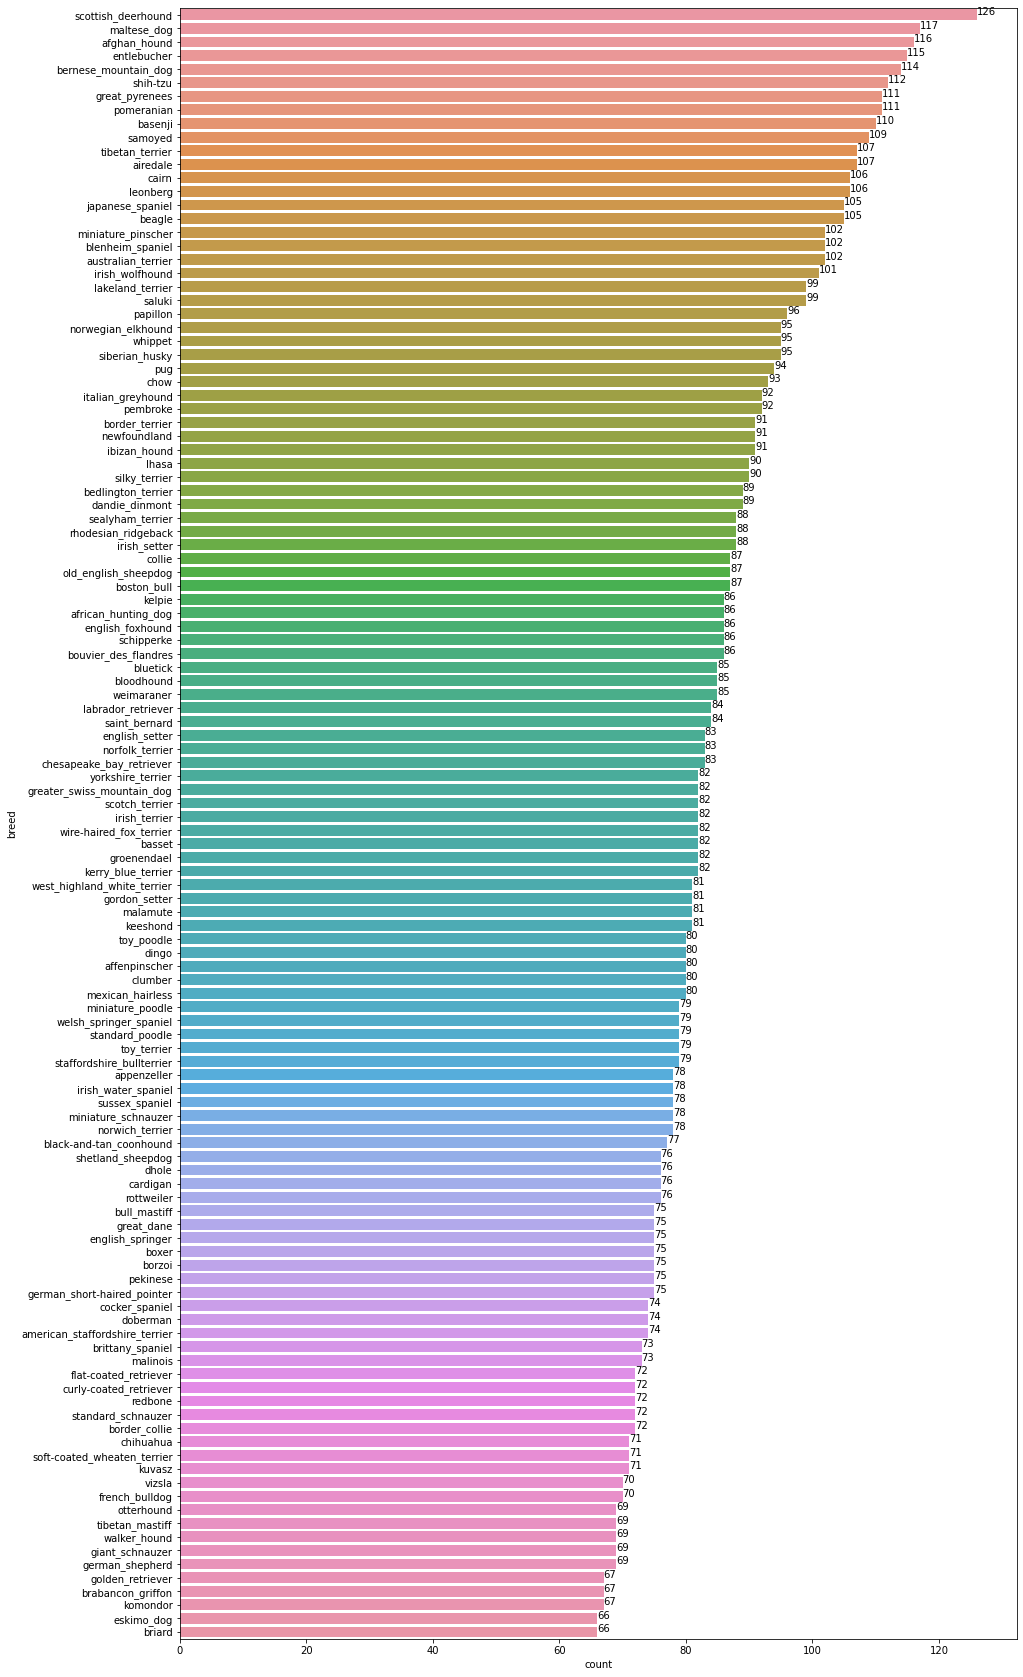

In [6]:
#function to show bar length
def barw(ax): 
    
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))
        
#finding top dog brands

plt.figure(figsize = (15,30))
ax0 =sns.countplot(y=labels['breed'],order=labels['breed'].value_counts().index)
barw(ax0)
plt.show()

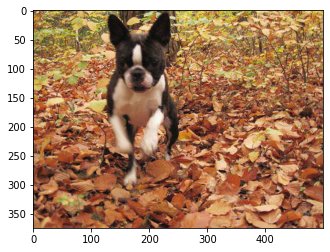

In [7]:
#display an image
%matplotlib inline

im1 = plt.imread('dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg') 

imgplot = plt.imshow(im1,cmap=plt.cm.gray)
plt.show()

In [8]:
#Create list of alphabetically sorted labels.
classes = sorted(list(set(labels['breed'])))
n_classes = len(classes)
print('Total unique breed {}'.format(n_classes))



#Map each label string to an integer label.
class_to_num = dict(zip(classes, range(n_classes)))
class_to_num

Total unique breed 120


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [9]:
input_shape = (331,331,3)

def images_to_array(directory, label_dataframe, target_size = input_shape):
    
    image_labels = label_dataframe['breed']
    images = np.zeros([len(label_dataframe), target_size[0], target_size[1], target_size[2]],dtype=np.uint8) #as we have huge data and limited ram memory. uint8 takes less memory
    y = np.zeros([len(label_dataframe),1],dtype = np.uint8)
    
    for ix, image_name in enumerate(tqdm(label_dataframe['id'].values)):
        img_dir = os.path.join(directory, image_name + '.jpg')
        img = load_img(img_dir, target_size = target_size)
#         img = np.expand_dims(img, axis=0)
#         img = processed_image_resnet(img)
#         img = img/255
        images[ix]=img
#         images[ix] = img_to_array(img)
        del img
        
        dog_breed = image_labels[ix]
        y[ix] = class_to_num[dog_breed]
    Y_list=y
    y = to_categorical(y)
    
    return images,y,Y_list

In [10]:
#Read train images and convert it to array
X,y,Y_list = images_to_array('dog-breed-identification/train', labels[:])


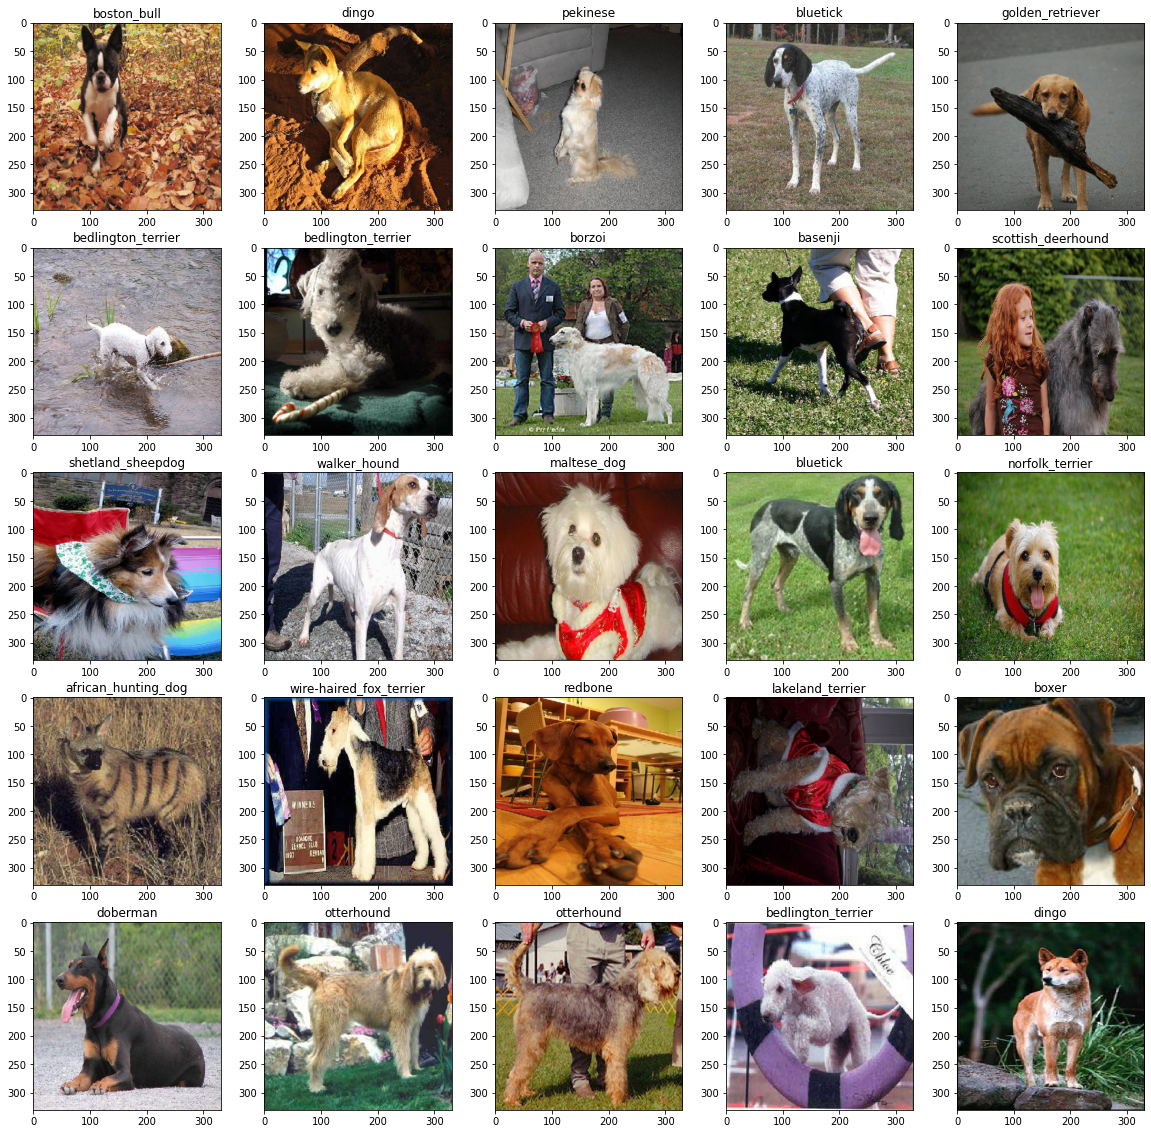

In [11]:
# lets check some dogs and their breeds
n=25

# setup the figure 
plt.figure(figsize=(20,20))

for i in range(n):
#     print(i)
    ax = plt.subplot(5, 5, i+1)
    plt.title(classes[np.where(y[i] ==1)[0][0]])
    plt.imshow(X[i].astype('int32')) # .astype('int32') ---> as imshow() needs integer data to read the image

In [12]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01, patience=3, min_lr=1e-5,verbose = 1)

#Prepare call backs
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [13]:
#define auc
auc = tf.keras.metrics.AUC(
    num_thresholds=200, curve='ROC',
    summation_method='interpolation', name=None, dtype=None,
    thresholds=None, multi_label=False, label_weights=None
)

In [14]:
# Hyperparameters
batch_size= 128
epochs=25
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None,  amsgrad=False)

In [15]:
#function to extract features from the dataset by a given pretrained model
img_size = (331,331,3)

def get_features(model_name, model_preprocessor, input_size, data):

    input_layer = Input(input_size)
    preprocessor = Lambda(model_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False,
                            input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs = input_layer, outputs = avg)
    
    #Extract feature.
    feature_maps = feature_extractor.predict(data, verbose=1)
    print('Feature maps shape: ', feature_maps.shape)
    return feature_maps

In [19]:
# CNN model
modelcnn = Sequential()

# -----------------------------------------------------------------------------------
# conv 1
modelcnn.add(Conv2D(16, (3,3), input_shape=(331,331,3)))       
modelcnn.add(BatchNormalization(axis=3))
modelcnn.add(Activation('relu'))
#model.add(Dropout(0.5))

# max pool 1
modelcnn.add(MaxPooling2D(pool_size=(2,2),strides=2))                                   

# -----------------------------------------------------------------------------------
# # conv 2
modelcnn.add(Conv2D(32, (3,3)))                                                         
modelcnn.add(BatchNormalization(axis=3))
modelcnn.add(Activation('relu'))
#model.add(Dropout(0.5))

# max pool 2
modelcnn.add(MaxPooling2D(pool_size=(2,2),strides=2))                                 
# -----------------------------------------------------------------------------------

# conv 3
modelcnn.add(Conv2D(48, (3,3)))                                                       
modelcnn.add(BatchNormalization(axis=3))
modelcnn.add(Activation('relu'))
#model.add(Dropout(0.7))

# max pool 3
modelcnn.add(MaxPooling2D(pool_size=(2,2),strides=2))                                
# -----------------------------------------------------------------------------------

# # conv 4
modelcnn.add(Conv2D(64, (3,3)))                                                     
modelcnn.add(BatchNormalization(axis=3))
modelcnn.add(Activation('relu'))
#model.add(Dropout(0.7))
# max pool 4
modelcnn.add(MaxPooling2D(pool_size=(2,2),strides=2))                              

# flatten
modelcnn.add(Flatten())                                                            

# fc layer 1
modelcnn.add(Dense(1024, activation='relu'))                                  

# fc layer 2
modelcnn.add(Dense(512, activation='relu'))

# fc layer 3
modelcnn.add(Dense(256, activation='relu'))

# fc layer 4
modelcnn.add(Dense(120, activation='softmax'))

In [21]:
# compile cnn model
modelcnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',auc])

In [23]:
#run cnn model
#Train Model. 
historycnn = modelcnn.fit(X, y,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=0.2,
            callbacks=[lrr,EarlyStop])

Epoch 1/25
64/64 [==============================] - 60s 377ms/step - loss: 8.2505 - accuracy: 0.0107 - auc: 0.5009 - val_loss: 4.8583 - val_accuracy: 0.0112 - val_auc: 0.5058
Epoch 2/25
64/64 [==============================] - 20s 313ms/step - loss: 4.7855 - accuracy: 0.0087 - auc: 0.5028 - val_loss: 4.8359 - val_accuracy: 0.0093 - val_auc: 0.5099
Epoch 3/25
64/64 [==============================] - 20s 314ms/step - loss: 4.7862 - accuracy: 0.0102 - auc: 0.5021 - val_loss: 4.7855 - val_accuracy: 0.0083 - val_auc: 0.5017
Epoch 4/25
64/64 [==============================] - 20s 316ms/step - loss: 4.7798 - accuracy: 0.0119 - auc: 0.5089 - val_loss: 4.7791 - val_accuracy: 0.0127 - val_auc: 0.5125
Epoch 5/25
64/64 [==============================] - 20s 318ms/step - loss: 4.7666 - accuracy: 0.0134 - auc: 0.5256 - val_loss: 4.7702 - val_accuracy: 0.0171 - val_auc: 0.5169
Epoch 6/25
64/64 [==============================] - 20s 320ms/step - loss: 4.7473 - accuracy: 0.0199 - auc: 0.5410 - val_loss

In [24]:
# Extract features using InceptionV3 
from keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocessor = preprocess_input
inception_features = get_features(InceptionV3,
                                  inception_preprocessor,
                                  img_size, X)

320/320 [==============================] - 51s 149ms/step
Feature maps shape:  (10222, 2048)


In [25]:
# Extract features using InceptionResnetV2
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
inc_resnet_preprocessor = preprocess_input
inc_resnet_features = get_features(InceptionResNetV2,
                                   inc_resnet_preprocessor,
                                   img_size, X)

320/320 [==============================] - 130s 394ms/step
Feature maps shape:  (10222, 1536)


In [26]:
# Extract features using Xception 
from keras.applications.xception import Xception, preprocess_input
xception_preprocessor = preprocess_input
xception_features = get_features(Xception,
                                 xception_preprocessor,
                                 img_size, X)

320/320 [==============================] - 114s 348ms/step
Feature maps shape:  (10222, 2048)


In [27]:
#to free up some ram memory
del X 
gc.collect()

95004

In [28]:
final_features = np.concatenate([inception_features,
                                 xception_features,
                                 inc_resnet_features,], axis=-1) #axis=-1 to concatinate horizontally

print('Final feature maps shape', final_features.shape)

Final feature maps shape (10222, 5632)


In [ ]:
#Splitting the data Set:
#splits = list(StratifiedKFold(n_splits=3, shuffle=True, random_state=10).split(final_features, Y_list))
#x_train_fold,x_val_fold,y_train_fold,y_val_fold = train_test_split(final_features,y,test_size=0.2,random_state=123)


In [29]:
#Define dnn Model
model = Sequential()
model.add(Dropout(0.7,input_shape=(final_features.shape[1],)))
model.add(Dense(n_classes,activation= 'softmax'))

#Complie dnn Model
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy',auc])

#Train dnnModel. 
history = model.fit(final_features, y,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=0.2,
            callbacks=[lrr,EarlyStop])

Epoch 1/25
64/64 [==============================] - 1s 12ms/step - loss: 2.7972 - accuracy: 0.4753 - auc: 0.8195 - val_loss: 0.2783 - val_accuracy: 0.9203 - val_auc: 0.9995
Epoch 2/25
64/64 [==============================] - 1s 8ms/step - loss: 0.2731 - accuracy: 0.9205 - auc: 0.9992 - val_loss: 0.2180 - val_accuracy: 0.9359 - val_auc: 0.9991
Epoch 3/25
64/64 [==============================] - 0s 8ms/step - loss: 0.2002 - accuracy: 0.9437 - auc: 0.9991 - val_loss: 0.2061 - val_accuracy: 0.9320 - val_auc: 0.9991
Epoch 4/25
64/64 [==============================] - 1s 8ms/step - loss: 0.1660 - accuracy: 0.9489 - auc: 0.9995 - val_loss: 0.1969 - val_accuracy: 0.9379 - val_auc: 0.9984
Epoch 5/25
64/64 [==============================] - 1s 8ms/step - loss: 0.1505 - accuracy: 0.9542 - auc: 0.9996 - val_loss: 0.1968 - val_accuracy: 0.9369 - val_auc: 0.9981
Epoch 6/25
64/64 [==============================] - 0s 8ms/step - loss: 0.1213 - accuracy: 0.9660 - auc: 0.9998 - val_loss: 0.2043 - val_ac

In [30]:
#deleting to free up ram memory

del inception_features
del xception_features
del inc_resnet_features
del final_features
gc.collect()

2013

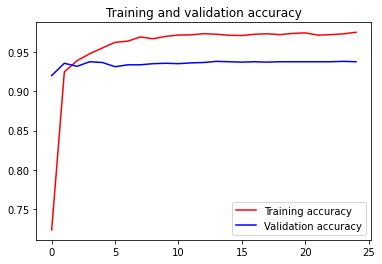

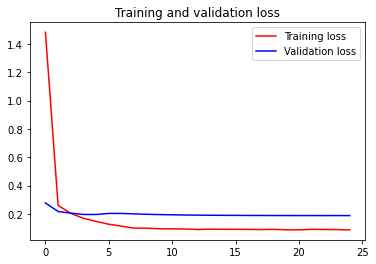

<Figure size 432x288 with 0 Axes>

In [31]:
#dnn Model
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()
plt.show()

<function matplotlib.pyplot.show>

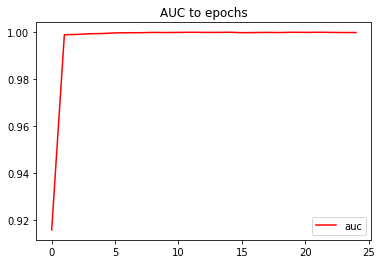

<Figure size 432x288 with 0 Axes>

In [32]:
#dnn Model
%matplotlib inline
auc = history.history['auc']
plt.plot(epochs, auc,'r-', label='auc')
plt.title("AUC to epochs")
plt.legend()
plt.figure()
plt.show

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 5632)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               675960    
Total params: 675,960
Trainable params: 675,960
Non-trainable params: 0
_________________________________________________________________


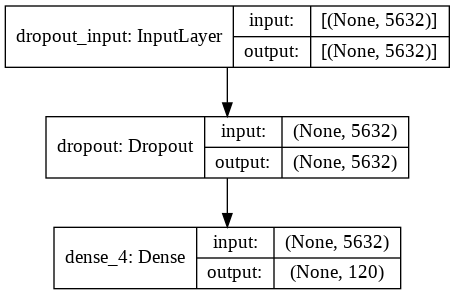

In [34]:
plot_model(model, to_file='dnn_model_plot.png', show_shapes=True, show_layer_names=True)

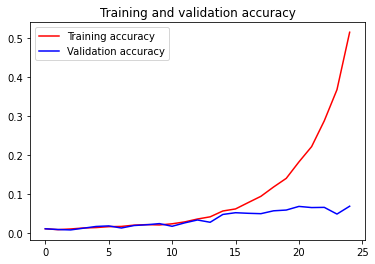

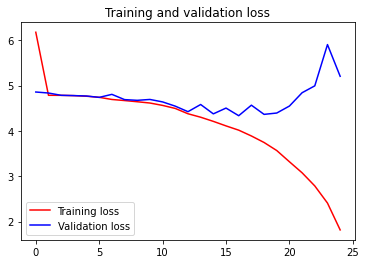

<Figure size 432x288 with 0 Axes>

In [36]:
#cnn Model
%matplotlib inline

accuracy = historycnn.history['accuracy']
val_accuracy = historycnn.history['val_accuracy']
loss = historycnn.history['loss']
val_loss = historycnn.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()
plt.show()

<function matplotlib.pyplot.show>

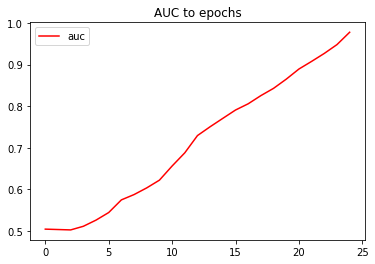

<Figure size 432x288 with 0 Axes>

In [37]:
#dnn Model
%matplotlib inline
auc = historycnn.history['auc']
plt.plot(epochs, auc,'r-', label='auc')
plt.title("AUC to epochs")
plt.legend()
plt.figure()
plt.show

In [38]:
modelcnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 329, 329, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 329, 329, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 329, 329, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 164, 164, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 162, 162, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 162, 162, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 162, 162, 32)     

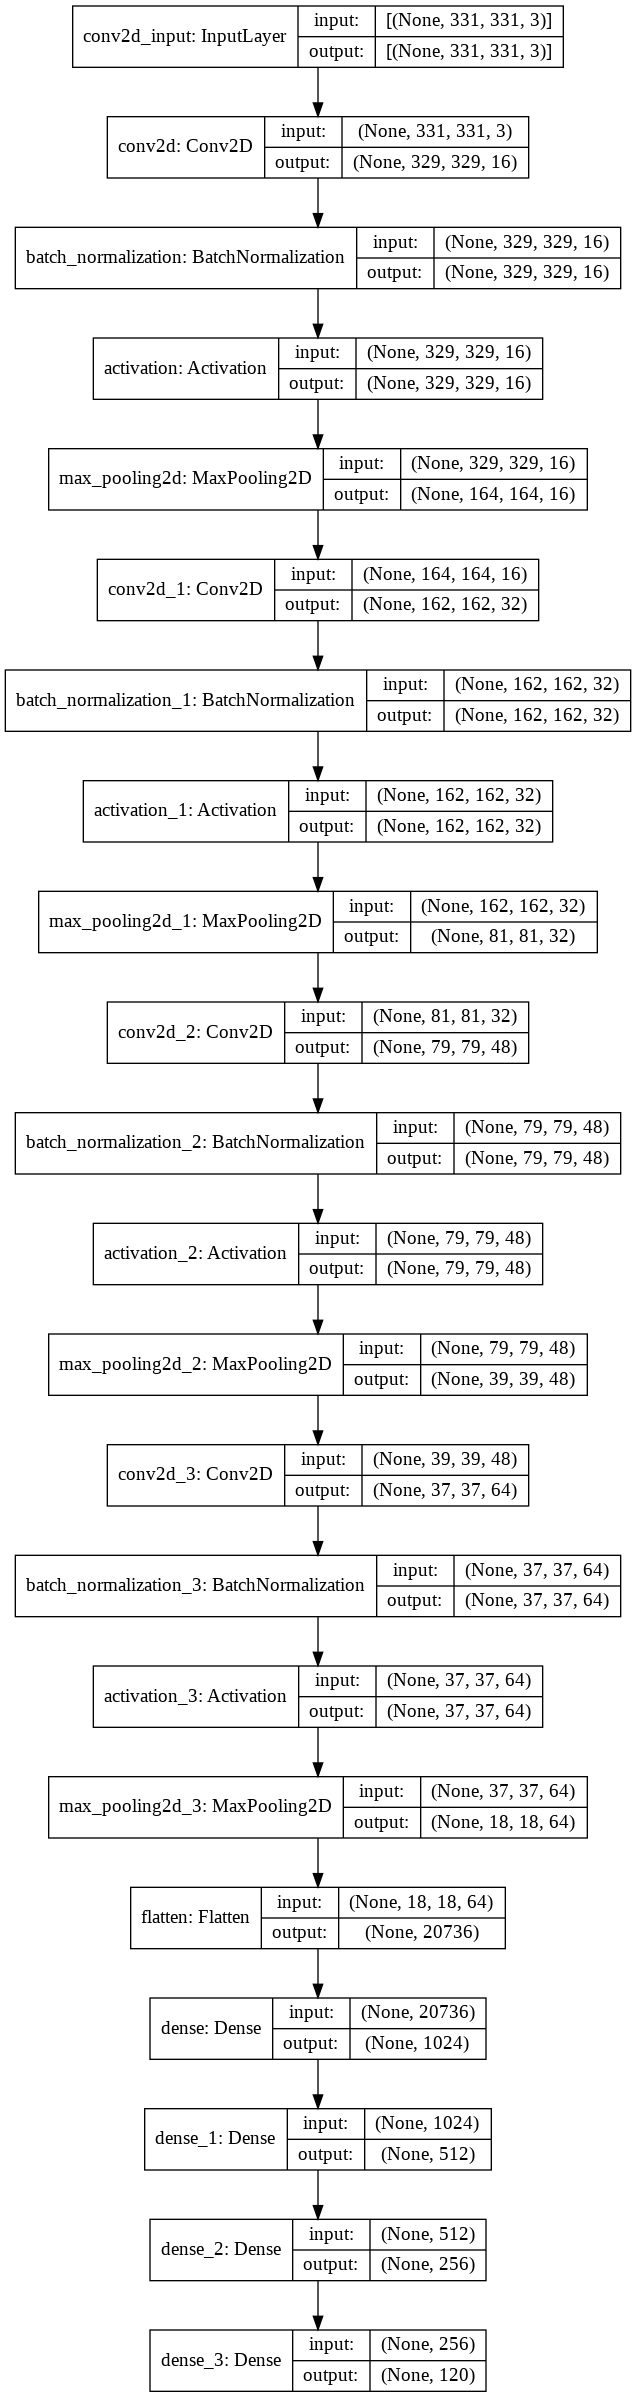

In [40]:
plot_model(modelcnn, to_file='cnn_model_plot.png', show_shapes=True, show_layer_names=True)

In [41]:
#function to read test images and convert them to ndarray 
def images_to_array_test(test_path, img_size = (331,331,3)):
    test_filenames = [test_path + fname for fname in os.listdir(test_path)]

    data_size = len(test_filenames)
    images = np.zeros([data_size, img_size[0], img_size[1], 3], dtype=np.uint8)
    
    for ix,img_dir in enumerate(tqdm(test_filenames)):
        img = load_img(img_dir, target_size = img_size)
        images[ix]=img
        del img
    print('Ouptut Data Size: ', images.shape)
    return images

test_data = images_to_array_test('dog-breed-identification/test/', img_size)


Ouptut Data Size:  (10357, 331, 331, 3)


In [44]:
def extact_features(data):
    inception_features = get_features(InceptionV3, inception_preprocessor, img_size, data)
    xception_features = get_features(Xception, xception_preprocessor, img_size, data)
    #nasnet_features = get_features(NASNetLarge, nasnet_preprocessor, img_size, data)
    inc_resnet_features = get_features(InceptionResNetV2, inc_resnet_preprocessor, img_size, data)

    final_features = np.concatenate([inception_features,
                                     xception_features,
                                     inc_resnet_features],axis=-1)
    
    print('Final feature maps shape', final_features.shape)
    
    #deleting to free up ram memory
    del inception_features
    del xception_features
    del inc_resnet_features
    gc.collect()

    return final_features

test_features = extact_features(test_data)

324/324 [==============================] - 47s 142ms/step
Feature maps shape:  (10357, 2048)
324/324 [==============================] - 109s 335ms/step
Feature maps shape:  (10357, 2048)
324/324 [==============================] - 131s 396ms/step
Feature maps shape:  (10357, 1536)
Final feature maps shape (10357, 5632)


In [45]:
#with dnn
predictions = model.predict(test_features)

In [46]:
#with cnn
predictionscnn = modelcnn.predict(test_data, batch_size=32, verbose=1)

324/324 [==============================] - 8s 23ms/step


In [47]:
#Free up some space.
del test_data
gc.collect()

1503

In [48]:
# First prediction with dnn
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {classes[np.argmax(predictions[0])]}")

[1.0653889e-06 9.4048852e-07 1.0737091e-06 9.9610679e-07 9.9017602e-01
 7.6940722e-07 5.3514873e-06 2.9492960e-06 3.7750627e-07 8.2607329e-07
 1.3022743e-06 2.1920744e-07 4.5548893e-07 1.0075746e-06 5.9679121e-07
 2.3699774e-06 7.3083265e-06 4.4093790e-06 3.5898765e-08 2.3651242e-05
 7.3327192e-06 1.8592660e-04 2.9223466e-07 2.9427792e-07 3.8363768e-07
 2.6120637e-03 5.0616300e-06 6.2007604e-07 5.7493980e-05 1.2403477e-06
 2.2224178e-05 6.6515154e-06 1.3686265e-07 2.7768474e-06 7.8915252e-07
 1.7490639e-06 7.3669071e-07 2.5706413e-06 3.1455929e-06 6.5321824e-06
 4.0822329e-07 1.1022195e-06 9.4108782e-07 7.6964252e-06 5.7998012e-08
 2.8919634e-05 2.3609100e-07 2.3577338e-06 1.3370931e-07 6.8708988e-07
 7.5351345e-08 1.5168393e-04 1.3132455e-06 7.9523152e-06 7.0129528e-07
 4.0226934e-07 3.1510470e-07 5.0113960e-07 3.9742696e-07 1.7589315e-06
 3.9809288e-06 1.4017957e-06 7.8162208e-07 1.6808141e-06 8.0608896e-07
 7.7157557e-07 9.1377601e-08 1.7369578e-06 7.4053600e-07 1.6337530e-06
 2.275

In [49]:
# First prediction with cnn
print(predictionscnn[0])
print(f"Max value (probability of prediction): {np.max(predictionscnn[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictionscnn[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictionscnn[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {classes[np.argmax(predictionscnn[0])]}")

[6.6837601e-05 1.2088122e-03 6.8623428e-03 4.5264995e-04 3.6552884e-02
 5.7311892e-03 1.3275319e-04 6.8413736e-03 2.3231504e-04 1.3913913e-04
 2.4416819e-03 4.6187150e-03 7.5511118e-05 7.0499141e-06 2.5351992e-04
 1.1967145e-02 1.2035508e-04 4.6903817e-03 4.8458530e-04 2.2071772e-03
 2.1282921e-03 8.3081913e-04 2.5819947e-05 2.2753691e-03 4.5610417e-05
 1.7413622e-02 4.5672830e-02 1.3964296e-03 1.0881199e-03 1.8068248e-02
 2.8248563e-05 5.7566398e-05 2.6076981e-03 1.7537458e-03 1.0817170e-03
 2.3366231e-02 3.5841414e-04 9.2672904e-05 8.0958530e-02 2.7693099e-05
 4.8304019e-03 9.8605924e-05 7.6530478e-03 1.3721557e-04 2.8199534e-04
 1.1828648e-03 1.2429314e-03 2.8429525e-02 1.0623533e-03 1.1905879e-04
 1.1502809e-04 4.6421092e-02 7.7101802e-05 2.1167905e-03 6.5746009e-03
 4.7780827e-04 4.1957464e-05 1.4151193e-04 1.6724219e-04 2.9437058e-02
 7.9367859e-03 5.0048500e-05 3.4781066e-03 3.5249747e-02 1.6130630e-03
 2.2639600e-03 1.3110869e-05 9.0053841e-04 3.8473224e-03 3.1715310e-05
 1.757

In [65]:
# Create pandas DataFrame with empty columns
preds_df_cnn = pd.DataFrame(columns=["id","breed"])
preds_df_dnn = pd.DataFrame(columns=["id","breed"])


In [66]:
# Append test image ID's to predictions DataFrame
test_path = "dog-breed-identification/test/"
preds_df_cnn["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df_dnn["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]


In [68]:
preds_df_cnn

,id,breed
0,873dc1b114bc51a7d186d95d4c6e582d,NaN
1,40cf82aac6661ef1210de377e22cf717,NaN
2,2f14a10ff1ab5435f25b42c3cd7677a7,NaN
3,814dbafbf2adc2f3cb3c57b076945cfd,NaN
4,c59dab52eaad61d038f9fda9fe3341b8,NaN
...,...,...
10352,65e17b791f47829e4b93646462cd4fd8,NaN
10353,2a6a5308f9d82b7d881cc02e13ebb41a,NaN
10354,76cb7463c74e7cb244f6ba0b129eed6e,NaN
10355,f7e3178f426d312a5a06ee7e012efbec,NaN


In [69]:
preds_df_dnn

,id,breed
0,873dc1b114bc51a7d186d95d4c6e582d,NaN
1,40cf82aac6661ef1210de377e22cf717,NaN
2,2f14a10ff1ab5435f25b42c3cd7677a7,NaN
3,814dbafbf2adc2f3cb3c57b076945cfd,NaN
4,c59dab52eaad61d038f9fda9fe3341b8,NaN
...,...,...
10352,65e17b791f47829e4b93646462cd4fd8,NaN
10353,2a6a5308f9d82b7d881cc02e13ebb41a,NaN
10354,76cb7463c74e7cb244f6ba0b129eed6e,NaN
10355,f7e3178f426d312a5a06ee7e012efbec,NaN


In [70]:
len(predictionscnn)

10357

In [71]:
len(predictions)

10357

In [72]:
classes[np.argmax(predictionscnn[0])]

'tibetan_terrier'

In [73]:
for i in range(len(predictionscnn)):
  temp = classes[np.argmax(predictionscnn[i])]
  preds_df_cnn['breed'][i]= temp

In [74]:
for i in range(len(predictions)):
  preds_df_dnn['breed'][i]= classes[np.argmax(predictions[i])]

In [75]:
print(preds_df_cnn)

                                     id                breed
0      873dc1b114bc51a7d186d95d4c6e582d      tibetan_terrier
1      40cf82aac6661ef1210de377e22cf717          entlebucher
2      2f14a10ff1ab5435f25b42c3cd7677a7  irish_water_spaniel
3      814dbafbf2adc2f3cb3c57b076945cfd              redbone
4      c59dab52eaad61d038f9fda9fe3341b8      german_shepherd
...                                 ...                  ...
10352  65e17b791f47829e4b93646462cd4fd8   australian_terrier
10353  2a6a5308f9d82b7d881cc02e13ebb41a             komondor
10354  76cb7463c74e7cb244f6ba0b129eed6e         walker_hound
10355  f7e3178f426d312a5a06ee7e012efbec      giant_schnauzer
10356  819b75579613e99d024dc42461146154      irish_wolfhound

[10357 rows x 2 columns]


In [76]:
preds_df_cnn.describe()

,id,breed
count,10357,10357
unique,10357,120
top,fa1460c331de2f6e6e5b1c97f1c51047,cairn
freq,1,327


In [77]:
print(preds_df_dnn)

                                     id                           breed
0      873dc1b114bc51a7d186d95d4c6e582d  american_staffordshire_terrier
1      40cf82aac6661ef1210de377e22cf717                     entlebucher
2      2f14a10ff1ab5435f25b42c3cd7677a7             irish_water_spaniel
3      814dbafbf2adc2f3cb3c57b076945cfd                   irish_terrier
4      c59dab52eaad61d038f9fda9fe3341b8                 norfolk_terrier
...                                 ...                             ...
10352  65e17b791f47829e4b93646462cd4fd8                 tibetan_mastiff
10353  2a6a5308f9d82b7d881cc02e13ebb41a                         whippet
10354  76cb7463c74e7cb244f6ba0b129eed6e                        cardigan
10355  f7e3178f426d312a5a06ee7e012efbec                 irish_wolfhound
10356  819b75579613e99d024dc42461146154                          saluki

[10357 rows x 2 columns]


In [79]:
preds_df_dnn.describe()

,id,breed
count,10357,10357
unique,10357,120
top,fa1460c331de2f6e6e5b1c97f1c51047,maltese_dog
freq,1,138


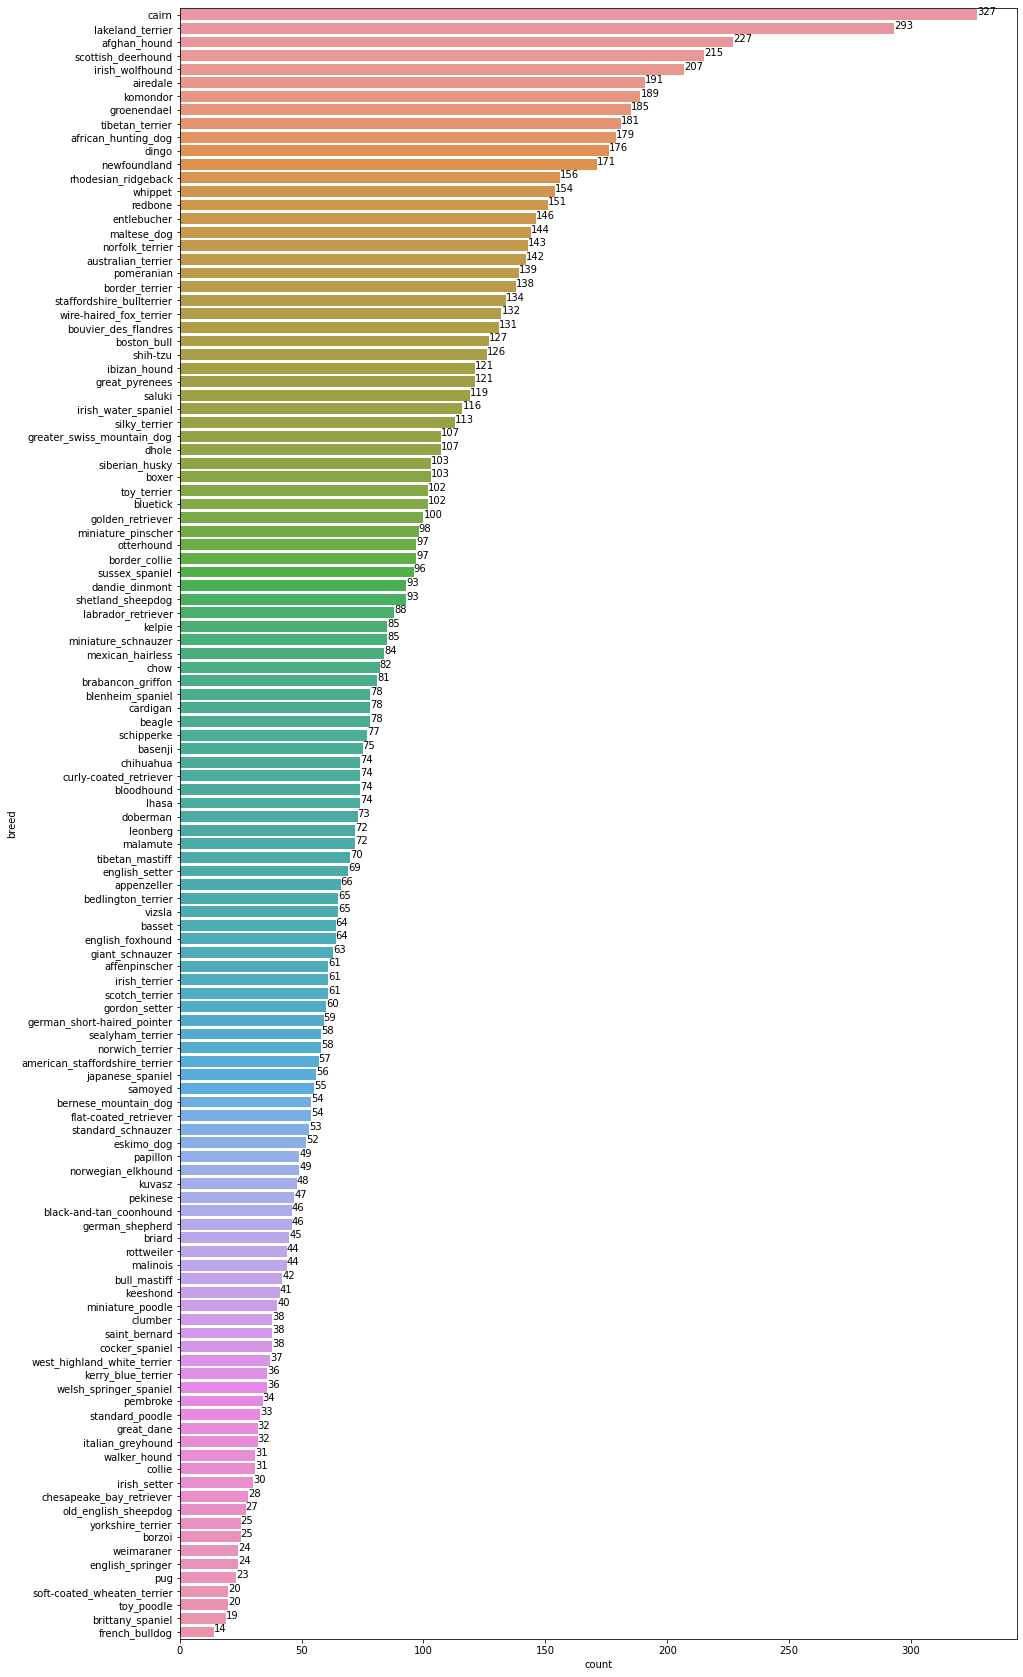

In [80]:
#function to show bar length
def barw(ax): 
    
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))
        
#finding top dog brands

plt.figure(figsize = (15,30))
ax0 =sns.countplot(y=preds_df_cnn['breed'],order=preds_df_cnn['breed'].value_counts().index)
barw(ax0)
plt.show()

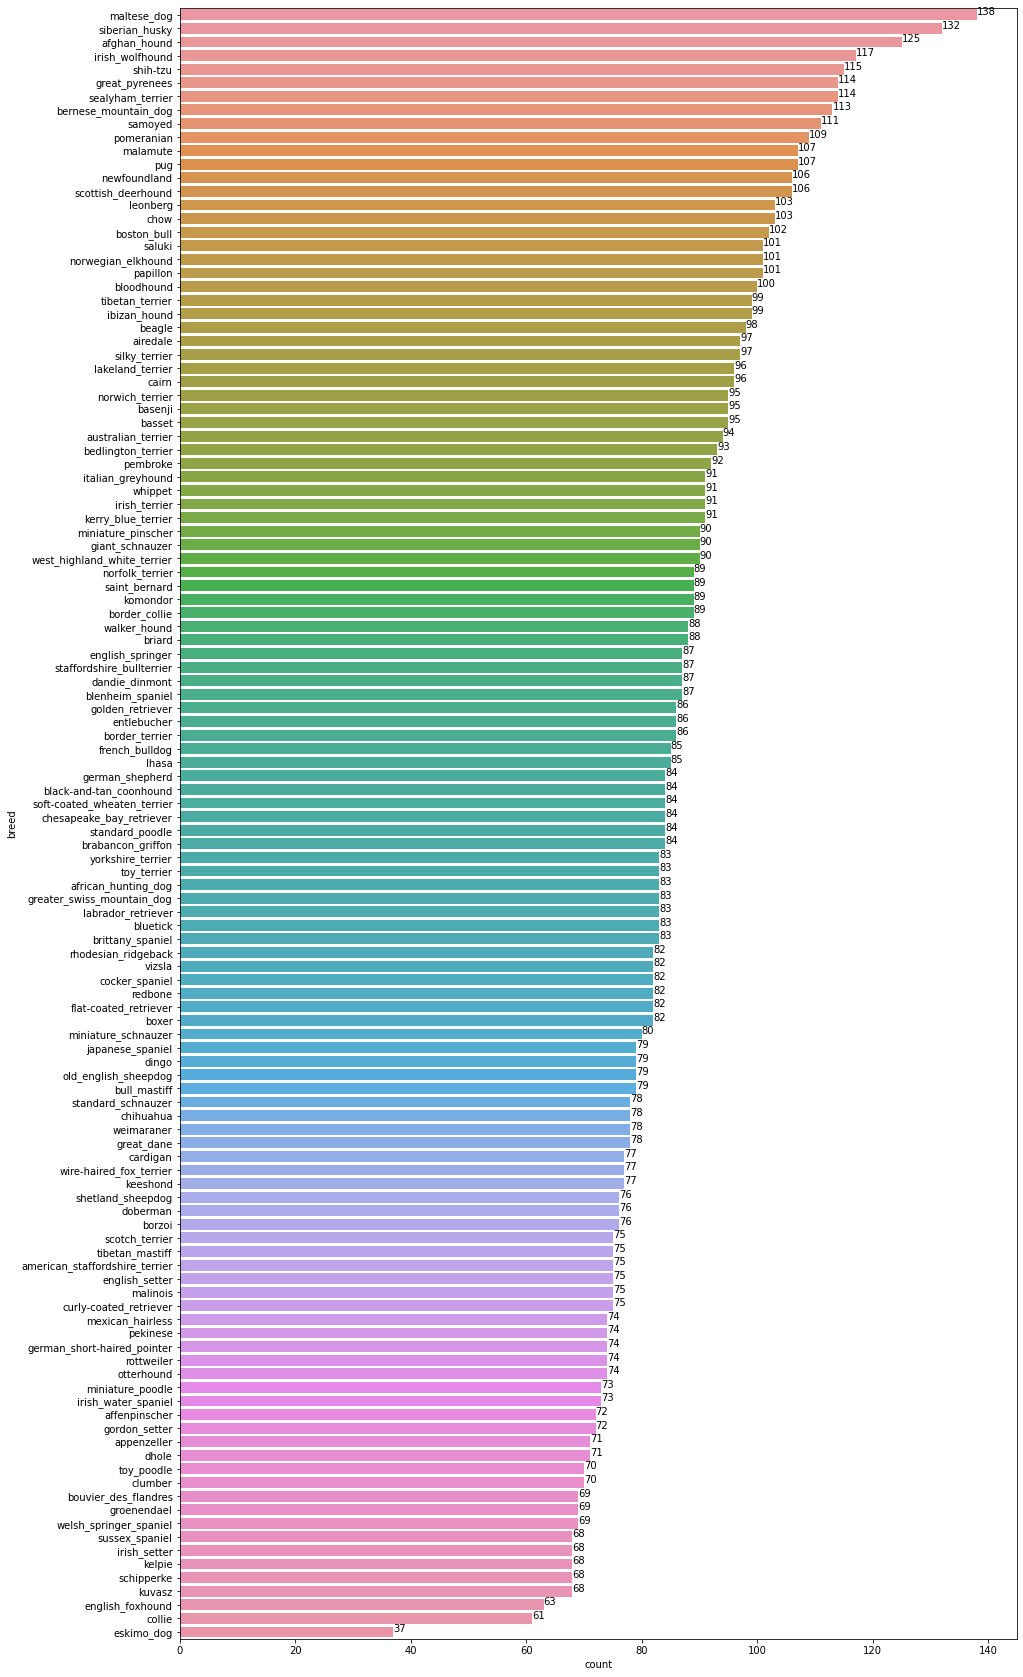

In [81]:
#function to show bar length
def barw(ax): 
    
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))
        
#finding top dog brands

plt.figure(figsize = (15,30))
ax0 =sns.countplot(y=preds_df_dnn['breed'],order=preds_df_dnn['breed'].value_counts().index)
barw(ax0)
plt.show()

### **TESTING CUSTOM IMAGE**

In [ ]:
#reading the image and converting it into an np array
#img_g = load_img('/users/jaytandel/dog3.jpeg',target_size = img_size)
#img_g = np.expand_dims(img_g, axis=0) 

In [ ]:
#display Custom Image:
#Image('dog3.jpeg')

In [ ]:
#Predict test labels given test data features.
#test_features = extact_features(img_g)
#redg = model.predict(test_features)
#print(f"Predicted label: {classes[np.argmax(predg[0])]}")
#print(f"Probability of prediction): {round(np.max(predg[0])) * 100} %")